In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sys
import os
import pandas as pd
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler

sys.path.append(os.path.abspath('../src/'))
from ModelSelection import *
from ActivationFunctions import *
from NeuralNetwork import *
from MyUtils import *

In [2]:
training_df = pd.read_csv(
    '../data/ML-CUP23-TR.csv',
    index_col=0,
    comment='#',
    header=None,
    names=['feature_' + str(i+1) for i in range(10)] + ['target_' + str(i+1) for i in range(3)]
)

In [3]:
data_set = training_df.values
len_data = len(data_set)

training_len = 0.7*len_data

training_df.head(5)

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,target_1,target_2,target_3
1,-0.917280,-0.712727,-0.989904,0.992819,0.993649,0.995543,0.711074,0.407645,-0.688548,0.616890,7.897453,-35.936382,21.077147
2,-0.858784,0.998755,-0.998396,0.999909,0.316503,-0.951897,-0.163139,0.980982,0.661759,-0.800155,-9.330632,19.901571,6.069154
3,-0.990441,0.958726,-0.998675,0.997216,0.987166,0.356483,-0.279689,0.599163,-0.684630,0.922901,14.849400,3.374090,19.667479
4,0.937117,0.984474,-0.612420,0.999812,0.728623,-0.539962,-0.165939,0.999352,-0.921444,-0.974766,-46.591854,13.734777,17.953600
5,-0.906628,-0.884567,-0.932487,0.941037,0.978134,0.998179,0.749606,-0.590599,-0.508268,0.691798,8.217500,-45.885254,14.894251


In [4]:
training_set = data_set[:int(training_len)]
validation_set = data_set[int(training_len):]

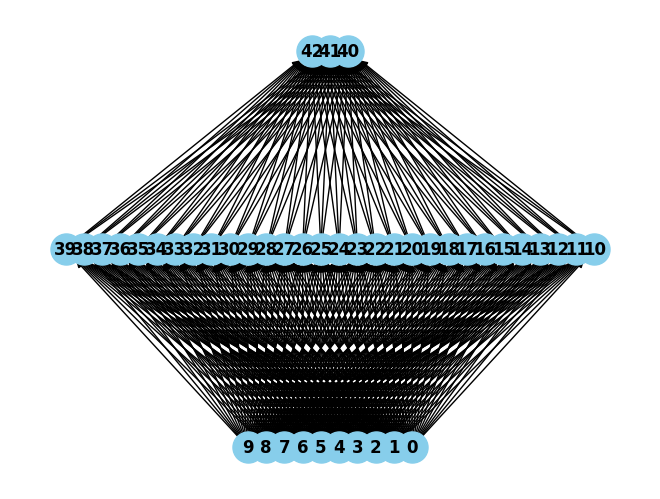

In [5]:
TR_OUTPUT = 3
TR_INPUT = data_set.shape[1] - TR_OUTPUT
hidden_len = 30

hidden_fun = 'tanh'
output_fun = 'identity'

topology = create_stratified_topology([TR_INPUT,hidden_len,TR_OUTPUT], 
                                      [[None,[]]]*TR_INPUT + [[hidden_fun, [1]]]*hidden_len + [[output_fun, []]]*TR_OUTPUT)

NeuralNetwork.display_topology(topology)

In [6]:
NN = NeuralNetwork(topology, -0.7, 0.7, False, RANDOM_STATE)

In [7]:
batch_size = 400
max_epochs = 300

metrics = [ErrorFunctions.mean_euclidean_error]

error_decrease_tolerance = 0.00000001
patience = 50
min_epochs = 100

lambda_tikhonov = 0.00000001
alpha_momentum = 0.4
learning_rate = 0.1/batch_size

collect_datas = True
collect_datas_batch = False 
verbose = True

nesterov = False
tau = 500
eta_tau = 0.01*learning_rate


stats = NN.train(training_set, validation_set, batch_size, max_epochs, error_decrease_tolerance, patience, min_epochs, 
         learning_rate, tau, eta_tau, lambda_tikhonov, alpha_momentum, nesterov, metrics, collect_datas, collect_datas_batch, verbose)


starting values:  {'training_set_len': 700, 'minibatch_size': 400, 'max_epochs': 300, 'error_decrease_tolerance': 1e-08, 'patience': 50, 'min_epochs': 100, 'learning_rate': 0.00025, 'lambda_tikhonov': 1e-08, 'alpha_momentum': 0.4, 'nesterov': False, 'epochs': 0, 'total_train_time': datetime.timedelta(days=-1, seconds=86399, microseconds=999981), 'mean_epoch_train_time': 0, 'units_weights': {39: [], 38: [], 37: [], 36: [], 35: [], 34: [], 33: [], 32: [], 31: [], 30: [], 29: [], 28: [], 27: [], 26: [], 25: [], 24: [], 23: [], 22: [], 21: [], 20: [], 19: [], 18: [], 17: [], 16: [], 15: [], 14: [], 13: [], 12: [], 11: [], 10: [], 42: [], 41: [], 40: []}, 'units_weights_batch': {39: [], 38: [], 37: [], 36: [], 35: [], 34: [], 33: [], 32: [], 31: [], 30: [], 29: [], 28: [], 27: [], 26: [], 25: [], 24: [], 23: [], 22: [], 21: [], 20: [], 19: [], 18: [], 17: [], 16: [], 15: [], 14: [], 13: [], 12: [], 11: [], 10: [], 42: [], 41: [], 40: []}, 'training_mean_euclidean_error': [], 'validation_mea

[1/300] tr time: 0:00:02.934783 | mean_euclidean_error: tr=48.22686666044932 val=47.6788431376483 | 
[2/300] tr time: 0:00:01.911648 | mean_euclidean_error: tr=38.149697663209274 val=38.93301214033349 | 
[3/300] tr time: 0:00:01.858786 | mean_euclidean_error: tr=31.356966251736843 val=32.63249834927779 | 
[4/300] tr time: 0:00:00.989813 | mean_euclidean_error: tr=29.03170440570927 val=31.069807668299077 | 
[5/300] tr time: 0:00:01.921984 | mean_euclidean_error: tr=28.833737708219154 val=30.72106279193865 | 
[6/300] tr time: 0:00:01.922012 | mean_euclidean_error: tr=25.394843248944426 val=27.288659001651105 | 
[7/300] tr time: 0:00:02.601186 | mean_euclidean_error: tr=23.90085811350951 val=25.694705572782286 | 
[8/300] tr time: 0:00:01.134619 | mean_euclidean_error: tr=24.669697032358577 val=25.837512673016157 | 
[9/300] tr time: 0:00:02.238310 | mean_euclidean_error: tr=24.38747305324723 val=25.29378510773243 | 
[10/300] tr time: 0:00:02.202594 | mean_euclidean_error: tr=22.80574401439

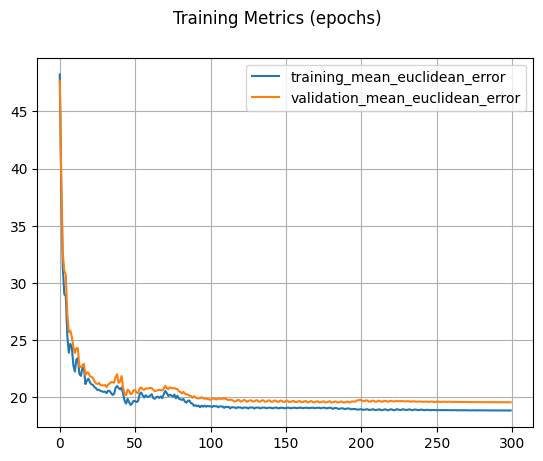

In [8]:
if len(metrics) > 1:
    fig, ax = plt.subplots(1, len(metrics), figsize=(10, 5))
    plt.suptitle('Training Metrics (epochs)')
    for i in range(len(metrics)):
        multy_plot([stats['training_' + metrics[i].__name__], stats['validation_' + metrics[i].__name__]], 
                ['training_' + metrics[i].__name__, 'validation_' + metrics[i].__name__],
                ax=ax[i])
else:
    plt.suptitle('Training Metrics (epochs)')
    multy_plot([stats['training_' + metrics[0].__name__], stats['validation_' + metrics[0].__name__]], 
                ['training_' + metrics[0].__name__, 'validation_' + metrics[0].__name__])